<a href="https://colab.research.google.com/github/Vinaysh259/SOLA_Implementation/blob/master/infersent_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
./get_data.bash

SyntaxError: ignored

In [0]:
!git clone https://github.com/facebookresearch/InferSent.git
  

Cloning into 'InferSent'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 235 (delta 4), reused 5 (delta 1), pack-reused 222
Receiving objects: 100% (235/235), 444.30 KiB | 815.00 KiB/s, done.
Resolving deltas: 100% (116/116), done.


In [0]:
./get_data.bash

SyntaxError: ignored

In [0]:
./get_data.bash

SyntaxError: ignored

In [0]:
!pwd

/content


In [0]:
%cd InferSent

/content/InferSent


In [0]:
!pwd

/content/InferSent


In [0]:
%cd dataset

/content/InferSent/dataset


In [0]:
!./get_data.bash

mkdir: cannot create directory ‘SNLI’: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 90.1M  100 90.1M    0     0  11.3M      0  0:00:07  0:00:07 --:--:-- 17.1M
Archive:  SNLI/snli_1.0.zip
   creating: SNLI/snli_1.0/
  inflating: SNLI/snli_1.0/.DS_Store  
   creating: SNLI/__MACOSX/
   creating: SNLI/__MACOSX/snli_1.0/
  inflating: SNLI/__MACOSX/snli_1.0/._.DS_Store  
 extracting: SNLI/snli_1.0/Icon      
  inflating: SNLI/__MACOSX/snli_1.0/._Icon  
  inflating: SNLI/snli_1.0/README.txt  
  inflating: SNLI/__MACOSX/snli_1.0/._README.txt  
  inflating: SNLI/snli_1.0/snli_1.0_dev.jsonl  
  inflating: SNLI/snli_1.0/snli_1.0_dev.txt  
  inflating: SNLI/snli_1.0/snli_1.0_test.jsonl  
  inflating: SNLI/snli_1.0/snli_1.0_test.txt  
  inflating: SNLI/snli_1.0/snli_1.0_train.jsonl  
  inflating: SNLI/snli_1.0/snli_1.0_train.txt  
  inflating: SNLI/__MACOSX/._snli_1.0  


In [0]:
%cd ..


/content/InferSent


In [0]:
%mkdir dataset/GloVe

In [0]:
!curl -Lo dataset/GloVe/glove.840B.300d.zip http://nlp.stanford.edu/data/glove.840B.300d.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0   315    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2075M  100 2075M    0     0  3881k      0  0:09:07  0:09:07 --:--:-- 18.8M


In [0]:
!unzip dataset/GloVe/glove.840B.300d.zip -d dataset/GloVe/

Archive:  dataset/GloVe/glove.840B.300d.zip
  inflating: dataset/GloVe/glove.840B.300d.txt  


In [0]:
from random import randint

import numpy as np
import torch
!pwd

/content/InferSent


In [0]:
!curl -Lo encoder/infersent1.pickle https://dl.fbaipublicfiles.com/infersent/infersent1.pkl

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  146M  100  146M    0     0  9664k      0  0:00:15  0:00:15 --:--:-- 31.9M


In [0]:
!pwd


/content/InferSent/encoder


In [0]:
!cd ..

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
%cd encoder

[Errno 2] No such file or directory: 'encoder'
/content/InferSent/encoder


In [0]:
!pwd

/content/InferSent/encoder


In [0]:
from models import InferSent
model_version = 1
MODEL_PATH = "infersent%s.pickle" % model_version
params_model = {'bsize': 64, 'word_emb_dim': 300, 'enc_lstm_dim': 2048,
                'pool_type': 'max', 'dpout_model': 0.0, 'version': model_version}
model = InferSent(params_model)
model.load_state_dict(torch.load(MODEL_PATH))

In [0]:
use_cuda = False
model = model.cuda() if use_cuda else model

In [0]:
!cd ..

In [0]:
!pwd

/content/InferSent/encoder


In [0]:
%cd ..

/content/InferSent


In [0]:
W2V_PATH = 'dataset/GloVe/glove.840B.300d.txt' if model_version == 1 else '../dataset/fastText/crawl-300d-2M.vec'
model.set_w2v_path(W2V_PATH)

In [0]:
model.build_vocab_k_words(K=100000)

Vocab size : 100000


In [0]:
sentences = []
with open('encoder/samples.txt') as f:
    for line in f:
        sentences.append(line.strip())
print(len(sentences))

9815


In [0]:
sentences[:5]

['Everyone really likes the newest benefits',
 'The Government Executive articles housed on the website are not able to be searched .',
 'I like him for the most part , but would still enjoy seeing someone beat him .',
 'My favorite restaurants are always at least a hundred miles away from my house .',
 'I know exactly .']

In [0]:
embeddings = model.encode(sentences, bsize=128, tokenize=False, verbose=True)
print('nb sentences encoded : {0}'.format(len(embeddings)))

Nb words kept : 128201/130068 (98.6%)
Speed : 41.8 sentences/s (cpu mode, bsize=128)
nb sentences encoded : 9815


In [0]:
(model.encode(['the cat eats.'])[0])

array([ 0.13108404,  0.0095878 ,  0.0045495 , ...,  0.02293485,
       -0.03814263, -0.01252606], dtype=float32)

In [0]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [0]:
cosine(model.encode(['the cat eats.'])[0], model.encode(['the cat drinks.'])[0])

0.8165239

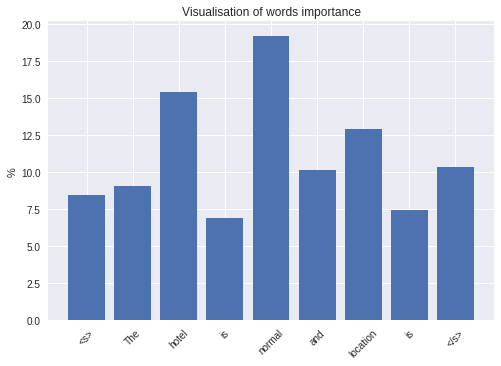

In [0]:
sentence = "The hotel is normal and location is not good"
_, _ = model.visualize(sentence)

In [0]:
import csv
with open('encoder/train_data_binary.csv') as csvfile:
  mpg = list(csv.DictReader(csvfile))

data = []
for d in mpg:
  data.append(d['SEGMENTS'])
print(data[:5])

['LOVED THE HAMPTON INN SEAPORT!!!!!!!!!!!!!!!!!!', 'Just returned from a 3 night stay.', 'This is a FABULOUS hotel.', 'The front desk staff, the doormen, the breakfast staff, EVERYONE is incredibly friendly and helpful and warm and welcoming.', 'The room was fabulous too.']


In [0]:

data=[x.lower() for x in data]     #To convert everything to lowercase

import re
data=[re.sub("\d+","", x) for x in data]  # To remove numbers

data=[re.sub(r'[^\w\s]','',x) for x in data]  #To remove punctuations

data=[x.strip() for x in data]

In [0]:
print(data[:2])

['loved the hampton inn seaport', 'just returned from a  night stay']


In [0]:
print(data[:2])